In [49]:
import duckdb
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

# Load the Postgres extension
duckdb.sql("INSTALL postgres_scanner;")
duckdb.sql("LOAD postgres_scanner;")

# credentials
pg_conn_str = "dbname='mimic-iii' user='sangeethgeorge' password='12345' host='localhost' port='5432'"

#SQL query to connect to DB
labs48_query = """
SELECT *
FROM postgres_scan('dbname=mimic-iii user=sangeethgeorge password=12345 host=localhost port=5432', 
                   'public', 'all_labs_48h')
"""
vitals48_query = """
SELECT *
FROM postgres_scan('dbname=mimic-iii user=sangeethgeorge password=12345 host=localhost port=5432', 
                   'public', 'all_vitals_48h')
"""

onc_cohort = """
SELECT *
FROM postgres_scan('dbname=mimic-iii user=sangeethgeorge password=12345 host=localhost port=5432', 
                   'public', 'oncology_icu_base')
"""

labs48_df= duckdb.sql(labs48_query).df()
vitals48_df = duckdb.sql(vitals48_query).df()
onc_cohort_df = duckdb.sql(onc_cohort).df()

In [50]:
labs48_df

,subject_id,hadm_id,icustay_id,icd9_code,short_title,itemid,labs_label,fluid,labs_category,charttime,labs_valuenum,labs_valueom,flag
0,18778,195341,260056,1912,Mal neo temporal lobe,51347,Eosinophils,Cerebrospinal Fluid (CSF),Hematology,2106-02-19 02:00:00,2.00,%,None
1,32458,182671,207405,2395,Other gu neoplasm NOS,51347,Eosinophils,Cerebrospinal Fluid (CSF),Hematology,2170-02-16 18:00:00,3.00,%,None
2,32458,182671,207405,1985,Secondary malig neo bone,51347,Eosinophils,Cerebrospinal Fluid (CSF),Hematology,2170-02-16 18:00:00,3.00,%,None
3,32458,182671,207405,1977,Second malig neo liver,51347,Eosinophils,Cerebrospinal Fluid (CSF),Hematology,2170-02-16 18:00:00,3.00,%,None
4,32458,182671,207405,1961,Mal neo lymph-intrathor,51347,Eosinophils,Cerebrospinal Fluid (CSF),Hematology,2170-02-16 18:00:00,3.00,%,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...
314529,64370,128238,268101,1970,Secondary malig neo lung,51279,Red Blood Cells,Blood,Hematology,2184-03-19 02:14:00,3.08,m/uL,abnormal
314530,64370,128238,268101,1570,Mal neo pancreas head,51279,Red Blood Cells,Blood,Hematology,2184-03-19 02:14:00,3.08,m/uL,abnormal
314531,64519,117513,258118,1624,Mal neo middle lobe lung,51279,Red Blood Cells,Blood,Hematology,2148-07-06 10:55:00,3.51,m/uL,abnormal
314532,64519,117513,258118,1624,Mal neo middle lobe lung,51279,Red Blood Cells,Blood,Hematology,2148-07-07 00:49:00,3.53,m/uL,abnormal


In [51]:
vitals48_df

,subject_id,hadm_id,icustay_id,icd9_code,short_title,itemid,vitals_label,vitals_category,dbsource,charttime,vitals_valuenum,vitals_valueuom
0,26088,194863,202891,185,Malign neopl prostate,25.0,AV Interval,None,carevue,2154-04-30,200.000000,msec
1,26088,194863,202891,185,Malign neopl prostate,25.0,AV Interval,None,carevue,2154-04-30,200.000000,msec
2,26088,194863,202891,185,Malign neopl prostate,25.0,AV Interval,None,carevue,2154-04-30,200.000000,msec
3,23412,132933,212872,1625,Mal neo lower lobe lung,26.0,AaDO2,None,carevue,2120-11-18,501.000000,mmHg
4,9779,110839,221891,1888,Malig neo bladder NEC,26.0,AaDO2,None,carevue,2134-12-24,45.549999,mmHg
...,...,...,...,...,...,...,...,...,...,...,...,...
1684789,73614,189675,236059,19889,Secondary malig neo NEC,228411.0,Strength R Leg,Neurological,metavision,2138-05-09,4.000000,None
1684790,96539,143034,243446,1985,Secondary malig neo bone,228411.0,Strength R Leg,Neurological,metavision,2105-08-11,4.000000,None
1684791,96539,143034,243446,1970,Secondary malig neo lung,228411.0,Strength R Leg,Neurological,metavision,2105-08-11,4.000000,None
1684792,96539,143034,243446,1984,Sec malig neo nerve NEC,228411.0,Strength R Leg,Neurological,metavision,2105-08-11,4.000000,None


In [52]:
onc_cohort_df.columns

Index(['subject_id', 'hadm_id', 'icustay_id', 'icd9_code', 'short_title',
       'intime', 'outtime', 'gender', 'dob', 'dod', 'admittime', 'ethnicity',
       'marital_status', 'insurance', 'admission_type', 'age',
       'mortality_30d'],
      dtype='object')

In [53]:
# Clean & Prepare
labs48_df['charttime'] = pd.to_datetime(labs48_df['charttime'])
labs48_df.dropna(subset=['labs_valuenum'], inplace=True)

# Clean & Prepare
vitals48_df['charttime'] = pd.to_datetime(vitals48_df['charttime'])
vitals48_df.dropna(subset=['vitals_valuenum'], inplace=True)


In [54]:
# --- High Coverage Vitals ---

# 1. Calculate the coverage for each vital label (percentage of unique ICU stays it appears in)
total_unique_stays = vitals48_df['icustay_id'].nunique()
vitals48_coverage = vitals48_df.groupby('vitals_label')['icustay_id'].nunique() / total_unique_stays

# 2. Define your high coverage threshold (e.g., 0.8 for 80%)
coverage_threshold = 0.7

# 3. Filter to get only the labels that meet the high coverage threshold
high_coverage_labels = vitals48_coverage[vitals48_coverage >= coverage_threshold].index.tolist()

print("Labels with High Coverage (>= {}%):".format(coverage_threshold * 100))
print(high_coverage_labels)

# 4. Filter the original DataFrame to include only these high-coverage labels
filtered_vitals_df_high_coverage = vitals48_df[vitals48_df['vitals_label'].isin(high_coverage_labels)]

# 5. Calculate unique ICU stays for each of the high-coverage labels
unique_stays_per_high_coverage_label = filtered_vitals_df_high_coverage.groupby('vitals_label')['icustay_id'].nunique()

# 6. Calculate the percentage of unique ICU stays for each high-coverage label
#    (This is essentially `vitals48_coverage` for the selected labels, but we recalculate
#     it here to fit the structure of the original code's output)
percentage_unique_stays_high_coverage = (unique_stays_per_high_coverage_label / total_unique_stays) * 100

# 7. Combine the counts and percentages for better readability
vitals48_high_coverage_pct_df = pd.DataFrame({
    'Unique ICU Stays Count': unique_stays_per_high_coverage_label,
    'Percentage of Total Unique ICU Stays': percentage_unique_stays_high_coverage
}).sort_values(by='Percentage of Total Unique ICU Stays', ascending=False)

vitals48_high_coverage_pct_df

Labels with High Coverage (>= 70.0%):
['BUN', 'Creatinine', 'Heart Rate', 'Hemoglobin', 'Magnesium', 'Phosphorous', 'Respiratory Rate', 'WBC']


,Unique ICU Stays Count,Percentage of Total Unique ICU Stays
vitals_label,,
Heart Rate,2373,99.205686
Respiratory Rate,2363,98.787625
Hemoglobin,2242,93.729097
Creatinine,2003,83.737458
BUN,2001,83.653846
WBC,1996,83.444816
Magnesium,1922,80.351171
Phosphorous,1857,77.633779


In [55]:
# --- High Coverage Labs ---

# 1. Calculate the coverage for each vital label (percentage of unique ICU stays it appears in)
total_unique_stays = labs48_df['icustay_id'].nunique()
labs48_coverage = labs48_df.groupby('labs_label')['icustay_id'].nunique() / total_unique_stays

# 2. Define your high coverage threshold (e.g., 0.8 for 80%)
coverage_threshold = 0.7

# 3. Filter to get only the labels that meet the high coverage threshold
high_coverage_labels = labs48_coverage[labs48_coverage >= coverage_threshold].index.tolist()

print("Labels with High Coverage (>= {}%):".format(coverage_threshold * 100))
print(high_coverage_labels)

# 4. Filter the original DataFrame to include only these high-coverage labels
filtered_labs_df_high_coverage = labs48_df[labs48_df['labs_label'].isin(high_coverage_labels)]

# 5. Calculate unique ICU stays for each of the high-coverage labels
unique_stays_per_high_coverage_label = filtered_labs_df_high_coverage.groupby('labs_label')['icustay_id'].nunique()

# 6. Calculate the percentage of unique ICU stays for each high-coverage label
#    (This is essentially `labs48_coverage` for the selected labels, but we recalculate
#     it here to fit the structure of the original code's output)
percentage_unique_stays_high_coverage = (unique_stays_per_high_coverage_label / total_unique_stays) * 100

# 7. Combine the counts and percentages for better readability
labs48_high_coverage_pct_df = pd.DataFrame({
    'Unique ICU Stays Count': unique_stays_per_high_coverage_label,
    'Percentage of Total Unique ICU Stays': percentage_unique_stays_high_coverage
}).sort_values(by='Percentage of Total Unique ICU Stays', ascending=False)

labs48_high_coverage_pct_df

Labels with High Coverage (>= 70.0%):
['Anion Gap', 'Bicarbonate', 'Calcium, Total', 'Chloride', 'Creatinine', 'Glucose', 'Hematocrit', 'Hemoglobin', 'INR(PT)', 'MCH', 'MCHC', 'MCV', 'Magnesium', 'PT', 'PTT', 'Phosphate', 'Platelet Count', 'Potassium', 'RDW', 'Red Blood Cells', 'Sodium', 'Urea Nitrogen', 'White Blood Cells']


,Unique ICU Stays Count,Percentage of Total Unique ICU Stays
labs_label,,
Glucose,2427,99.182673
Potassium,2426,99.141806
Sodium,2422,98.978341
Urea Nitrogen,2421,98.937474
Chloride,2421,98.937474
Creatinine,2421,98.937474
Bicarbonate,2420,98.896608
Anion Gap,2419,98.855742
Hematocrit,2418,98.814875


In [56]:
# --- High Coverage Vitals ---

# 1. Calculate the coverage for each vital label (percentage of unique ICU stays it appears in)
total_unique_stays = vitals48_df['icustay_id'].nunique()
vitals48_coverage = vitals48_df.groupby('vitals_label')['icustay_id'].nunique() / total_unique_stays

# 2. Define your high coverage threshold (e.g., 0.8 for 80%)
coverage_threshold = 0.95

# 3. Filter to get only the labels that meet the high coverage threshold
high_coverage_labels = vitals48_coverage[vitals48_coverage >= coverage_threshold].index.tolist()

print("Labels with High Coverage (>= {}%):".format(coverage_threshold * 100))
print(high_coverage_labels)

# 4. Filter the original DataFrame to include only these high-coverage labels
filtered_vitals_df_high_coverage = vitals48_df[vitals48_df['vitals_label'].isin(high_coverage_labels)]

# 5. Calculate unique ICU stays for each of the high-coverage labels
unique_stays_per_high_coverage_label = filtered_vitals_df_high_coverage.groupby('vitals_label')['icustay_id'].nunique()

# 6. Calculate the percentage of unique ICU stays for each high-coverage label
percentage_unique_stays_high_coverage = (unique_stays_per_high_coverage_label / total_unique_stays) * 100

# 7. Combine the counts and percentages for better readability
vitals48_high_coverage_pct_df = pd.DataFrame({
    'Unique ICU Stays Count': unique_stays_per_high_coverage_label,
    'Percentage of Total Unique ICU Stays': percentage_unique_stays_high_coverage
}).sort_values(by='Percentage of Total Unique ICU Stays', ascending=False)

vitals48_high_coverage_pct_df

# Start from your filtered long-form vitals
df = filtered_vitals_df_high_coverage.copy()

# Convert charttime to datetime if not already (redundant if already done, but safe)
df['charttime'] = pd.to_datetime(df['charttime'])

# Feature engineering function per vital per ICU stay
def compute_time_series_features(group):
    # Ensure times and values are numpy arrays for reshape
    times = (group['charttime'] - group['charttime'].min()).dt.total_seconds().values / 3600.0  # in hours
    values = group['vitals_valuenum'].values

    # Defensive check
    if len(values) < 1:
        return pd.Series({'mean': np.nan, 'min': np.nan, 'max': np.nan, 'slope': np.nan})

    # Compute features
    features = {
        'mean': np.mean(values),
        'min': np.min(values),
        'max': np.max(values),
    }

    # Linear regression slope over time
    if len(values) > 1:
        # Use .reshape(-1, 1) on the NumPy array obtained from .values
        model = LinearRegression().fit(times.reshape(-1, 1), values)
        features['slope'] = model.coef_[0]
    else:
        features['slope'] = np.nan

    return pd.Series(features)

# Group by ICU stay and label → apply function
grouped = df.groupby(['icustay_id', 'vitals_label'])
vitals_features_df = grouped.apply(compute_time_series_features, include_groups=False).reset_index()
# Pivot to wide format
vitals_features_wide = vitals_features_df.pivot(index='icustay_id', columns='vitals_label')
vitals_features_wide.columns = [f"{stat.lower()}_{label.lower().replace(' ', '_')}" for stat, label in vitals_features_wide.columns]
vitals_features_wide.reset_index(inplace=True)


vitals_features_wide


Labels with High Coverage (>= 95.0%):
['Heart Rate', 'Respiratory Rate']


,icustay_id,mean_heart_rate,mean_respiratory_rate,min_heart_rate,min_respiratory_rate,max_heart_rate,max_respiratory_rate,slope_heart_rate,slope_respiratory_rate
0,200035,106.777778,21.555556,99.0,17.0,127.0,30.0,0.000000,0.000000
1,200044,67.562500,14.066667,55.0,8.0,86.0,20.0,0.000000,0.000000
2,200163,68.185185,16.148148,60.0,12.0,79.0,20.0,0.131944,0.008681
3,200289,87.187500,14.062500,81.0,10.0,93.0,19.0,0.000000,0.000000
4,200402,101.147059,24.294118,93.0,17.0,117.0,31.0,0.038542,-0.082292
...,...,...,...,...,...,...,...,...,...
2368,299933,80.263158,21.684211,67.0,10.0,89.0,29.0,0.326637,0.091518
2369,299947,68.972222,13.666667,56.0,7.0,86.0,25.0,-0.465278,-0.291667
2370,299971,66.200000,16.600000,57.0,14.0,76.0,24.0,0.000000,0.000000
2371,299979,61.388889,14.833333,46.0,11.0,81.0,23.0,0.000000,0.000000


In [57]:
# --- High Coverage labs ---

# 1. Calculate the coverage for each vital label (percentage of unique ICU stays it appears in)
total_unique_stays = labs48_df['icustay_id'].nunique()
labs48_coverage = labs48_df.groupby('labs_label')['icustay_id'].nunique() / total_unique_stays

# 2. Define your high coverage threshold (e.g., 0.8 for 80%)
coverage_threshold = 0.95

# 3. Filter to get only the labels that meet the high coverage threshold
high_coverage_labels = labs48_coverage[labs48_coverage >= coverage_threshold].index.tolist()

print("Labels with High Coverage (>= {}%):".format(coverage_threshold * 100))
print(high_coverage_labels)

# 4. Filter the original DataFrame to include only these high-coverage labels
filtered_labs_df_high_coverage = labs48_df[labs48_df['labs_label'].isin(high_coverage_labels)]

# 5. Calculate unique ICU stays for each of the high-coverage labels
unique_stays_per_high_coverage_label = filtered_labs_df_high_coverage.groupby('labs_label')['icustay_id'].nunique()

# 6. Calculate the percentage of unique ICU stays for each high-coverage label
percentage_unique_stays_high_coverage = (unique_stays_per_high_coverage_label / total_unique_stays) * 100

# 7. Combine the counts and percentages for better readability
labs48_high_coverage_pct_df = pd.DataFrame({
    'Unique ICU Stays Count': unique_stays_per_high_coverage_label,
    'Percentage of Total Unique ICU Stays': percentage_unique_stays_high_coverage
}).sort_values(by='Percentage of Total Unique ICU Stays', ascending=False)

labs48_high_coverage_pct_df

# Start from your filtered long-form labs
df = filtered_labs_df_high_coverage.copy()

# Convert charttime to datetime if not already (redundant if already done, but safe)
df['charttime'] = pd.to_datetime(df['charttime'])

# Feature engineering function per vital per ICU stay
def compute_time_series_features(group):
    # Ensure times and values are numpy arrays for reshape
    times = (group['charttime'] - group['charttime'].min()).dt.total_seconds().values / 3600.0  # in hours
    values = group['labs_valuenum'].values

    # Defensive check
    if len(values) < 1:
        return pd.Series({'mean': np.nan, 'min': np.nan, 'max': np.nan, 'slope': np.nan})

    # Compute features
    features = {
        'mean': np.mean(values),
        'min': np.min(values),
        'max': np.max(values),
    }

    # Linear regression slope over time
    if len(values) > 1:
        # Use .reshape(-1, 1) on the NumPy array obtained from .values
        model = LinearRegression().fit(times.reshape(-1, 1), values)
        features['slope'] = model.coef_[0]
    else:
        features['slope'] = np.nan

    return pd.Series(features)

# Group by ICU stay and label → apply function
grouped = df.groupby(['icustay_id', 'labs_label'])
labs_features_df = grouped.apply(compute_time_series_features, include_groups=False).reset_index()
# Pivot to wide format
labs_features_wide = labs_features_df.pivot(index='icustay_id', columns='labs_label')
labs_features_wide.columns = [f"{stat.lower()}_{label.lower().replace(' ', '_')}" for stat, label in labs_features_wide.columns]
labs_features_wide.reset_index(inplace=True)

labs_features_wide


Labels with High Coverage (>= 95.0%):
['Anion Gap', 'Bicarbonate', 'Chloride', 'Creatinine', 'Glucose', 'Hematocrit', 'Hemoglobin', 'MCH', 'MCHC', 'MCV', 'Magnesium', 'Platelet Count', 'Potassium', 'RDW', 'Red Blood Cells', 'Sodium', 'Urea Nitrogen', 'White Blood Cells']


,icustay_id,mean_anion_gap,mean_bicarbonate,mean_chloride,mean_creatinine,mean_glucose,mean_hematocrit,mean_hemoglobin,mean_mch,mean_mchc,...,slope_mchc,slope_mcv,slope_magnesium,slope_platelet_count,slope_potassium,slope_rdw,slope_red_blood_cells,slope_sodium,slope_urea_nitrogen,slope_white_blood_cells
0,200035,12.000000,26.000000,99.000000,0.750000,91.000000,33.800000,11.000000,26.550000,32.550000,...,0.068182,-0.045455,-0.004545,-0.909091,-0.036364,0.013636,-0.012273,0.136364,-0.227273,-0.095455
1,200044,11.500000,24.000000,102.000000,0.700000,101.500000,33.450000,11.750000,29.700000,35.200000,...,0.023747,-0.039578,NaN,0.672823,0.007916,-0.003958,0.016623,0.039578,-0.316623,-0.003958
2,200163,12.666667,29.666667,100.666667,0.733333,133.666667,39.200000,13.100000,27.500000,33.500000,...,-0.061314,0.000000,-0.002502,-0.875912,0.008765,-0.008759,-0.000876,0.012500,0.337914,-0.021898
3,200289,13.000000,28.000000,100.500000,0.700000,204.000000,38.400000,13.000000,30.950000,33.900000,...,-0.109518,0.273794,0.000000,-1.095176,0.019557,0.000000,-0.018774,0.039113,-0.117340,-0.418514
4,200402,11.666667,25.666667,104.333333,0.766667,95.000000,26.300000,9.033333,30.100000,34.400000,...,0.017038,0.059310,-0.016165,-0.789039,-0.004303,-0.024015,-0.023230,-0.164558,0.020058,-0.046025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2435,299933,12.666667,27.000000,105.000000,0.700000,127.333333,40.800000,14.766667,31.200000,36.266667,...,0.018180,0.041490,0.009990,-1.445581,0.010044,-0.025002,-0.023567,0.083522,0.033300,-0.094987
2436,299947,10.500000,29.500000,97.250000,0.675000,164.500000,25.060000,8.940000,30.725000,34.550000,...,-0.021295,0.013857,0.001510,-0.468052,-0.017729,-0.005215,-0.019154,-0.042342,0.011372,0.120547
2437,299971,14.000000,24.000000,105.000000,0.800000,152.000000,24.900000,8.500000,32.100000,34.100000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2438,299979,8.500000,25.000000,107.000000,0.800000,137.500000,28.733333,9.600000,27.566667,33.433333,...,0.053314,-0.044550,-0.004386,-3.427421,0.000000,0.017384,0.008798,0.043860,-0.087719,-0.281778


In [58]:
# Merge vitals
onco_feature_df = onc_cohort_df.merge(vitals_features_wide, on='icustay_id', how='left')

# Merge labs
onco_feature_df = onco_feature_df.merge(labs_features_wide, on='icustay_id', how='left')

onco_feature_df

,subject_id,hadm_id,icustay_id,icd9_code,short_title,intime,outtime,gender,dob,dod,...,slope_mchc,slope_mcv,slope_magnesium,slope_platelet_count,slope_potassium,slope_rdw,slope_red_blood_cells,slope_sodium,slope_urea_nitrogen,slope_white_blood_cells
0,84,166401,239661,1919,Malig neo brain NOS,2196-04-16 23:43:00,2196-04-17 13:42:00,F,2151-10-21,2196-04-17,...,NaN,NaN,0.280576,NaN,0.302158,NaN,NaN,2.374101,0.215827,NaN
1,113,109976,224661,1915,Mal neo cereb ventricle,2140-12-12 22:48:08,2140-12-13 17:42:46,M,2105-02-09,NaT,...,-0.008797,0.014706,-0.004398,-0.776996,-0.010740,0.000000,-0.012172,-0.043983,0.024420,-0.075244
2,11,194540,229441,1913,Mal neo parietal lobe,2178-04-16 06:19:32,2178-04-17 20:21:05,F,2128-02-22,2178-11-14,...,0.092863,-0.103181,NaN,-0.773861,-0.005159,0.005159,-0.007739,0.051591,0.257954,0.180567
3,505,116719,257903,1970,Secondary malig neo lung,2154-03-30 14:59:43,2154-03-31 16:35:08,M,2097-11-23,2154-08-29,...,0.012673,0.048179,0.011751,0.473928,-0.003190,-0.024338,0.008389,0.040585,-0.068471,-0.018512
4,505,116719,257903,1985,Secondary malig neo bone,2154-03-30 14:59:43,2154-03-31 16:35:08,M,2097-11-23,2154-08-29,...,0.012673,0.048179,0.011751,0.473928,-0.003190,-0.024338,0.008389,0.040585,-0.068471,-0.018512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4265,98701,124568,292251,179,Malig neopl uterus NOS,2136-03-01 21:31:34,2136-03-02 18:35:05,F,2082-03-31,2136-03-11,...,0.065605,-0.058843,-0.004118,-1.798152,0.010550,-0.006502,-0.004858,0.011612,0.035166,0.068875
4266,98701,124568,292251,1976,Sec mal neo peritoneum,2136-03-01 21:31:34,2136-03-02 18:35:05,F,2082-03-31,2136-03-11,...,0.065605,-0.058843,-0.004118,-1.798152,0.010550,-0.006502,-0.004858,0.011612,0.035166,0.068875
4267,98701,124568,292251,1977,Second malig neo liver,2136-03-01 21:31:34,2136-03-02 18:35:05,F,2082-03-31,2136-03-11,...,0.065605,-0.058843,-0.004118,-1.798152,0.010550,-0.006502,-0.004858,0.011612,0.035166,0.068875
4268,98701,124568,292251,1978,Sec mal neo GI NEC,2136-03-01 21:31:34,2136-03-02 18:35:05,F,2082-03-31,2136-03-11,...,0.065605,-0.058843,-0.004118,-1.798152,0.010550,-0.006502,-0.004858,0.011612,0.035166,0.068875


In [59]:

# 1. Calculate the percentage of non-null values for each column
completeness = onco_feature_df.count() / len(onco_feature_df)

# 2. Define a threshold for "most of its rows filled"
completeness_threshold = 0.95

# 3. Filter columns based on the completeness threshold
high_completeness_columns = completeness[completeness >= completeness_threshold].index.tolist()

print(f"Columns with at least {completeness_threshold*100}% of rows filled:")
print(high_completeness_columns)

# 4. Select these columns from the original DataFrame
onco_features_high_completeness = onco_feature_df[high_completeness_columns]

onco_features_high_completeness


# percentage or an absolute number of non-NaN values.
percentage_filled_threshold = 0.95 # Keep rows that are at least 75% filled

# Calculate the minimum number of non-NaN values required based on the percentage
num_columns = onco_features_high_completeness.shape[1]
min_non_nan_for_row = int(num_columns * percentage_filled_threshold)

print(f"Keeping rows with at least {min_non_nan_for_row} non-NaN values (i.e., {percentage_filled_threshold*100}% filled).")

# Drop rows using the calculated threshold
onco_cohort_ML = onco_features_high_completeness.dropna(
    axis=0,        # Operate on rows (default, but good to be explicit)
    thresh=min_non_nan_for_row
).copy()

print("\nDataFrame after dropping rows that are less than {}% filled:".format(percentage_filled_threshold*100))
onco_cohort_ML

Columns with at least 95.0% of rows filled:
['subject_id', 'hadm_id', 'icustay_id', 'icd9_code', 'short_title', 'intime', 'outtime', 'gender', 'dob', 'admittime', 'ethnicity', 'marital_status', 'insurance', 'admission_type', 'age', 'mortality_30d', 'mean_heart_rate', 'min_heart_rate', 'max_heart_rate', 'slope_heart_rate', 'mean_anion_gap', 'mean_bicarbonate', 'mean_chloride', 'mean_creatinine', 'mean_glucose', 'mean_hematocrit', 'mean_hemoglobin', 'mean_mch', 'mean_mchc', 'mean_mcv', 'mean_platelet_count', 'mean_potassium', 'mean_rdw', 'mean_red_blood_cells', 'mean_sodium', 'mean_urea_nitrogen', 'mean_white_blood_cells', 'min_anion_gap', 'min_bicarbonate', 'min_chloride', 'min_creatinine', 'min_glucose', 'min_hematocrit', 'min_hemoglobin', 'min_mch', 'min_mchc', 'min_mcv', 'min_platelet_count', 'min_potassium', 'min_rdw', 'min_red_blood_cells', 'min_sodium', 'min_urea_nitrogen', 'min_white_blood_cells', 'max_anion_gap', 'max_bicarbonate', 'max_chloride', 'max_creatinine', 'max_glucose'

,subject_id,hadm_id,icustay_id,icd9_code,short_title,intime,outtime,gender,dob,admittime,...,max_mch,max_mchc,max_mcv,max_platelet_count,max_potassium,max_rdw,max_red_blood_cells,max_sodium,max_urea_nitrogen,max_white_blood_cells
0,84,166401,239661,1919,Malig neo brain NOS,2196-04-16 23:43:00,2196-04-17 13:42:00,F,2151-10-21,2196-04-14 04:02:00,...,30.9,35.8,86.0,231.0,3.9,13.5,4.07,138.0,7.0,11.6
1,113,109976,224661,1915,Mal neo cereb ventricle,2140-12-12 22:48:08,2140-12-13 17:42:46,M,2105-02-09,2140-12-12 22:46:00,...,31.7,36.3,88.0,252.0,4.4,12.4,4.21,141.0,15.0,11.7
2,11,194540,229441,1913,Mal neo parietal lobe,2178-04-16 06:19:32,2178-04-17 20:21:05,F,2128-02-22,2178-04-16 06:18:00,...,29.2,34.8,86.0,258.0,3.9,13.6,4.45,142.0,19.0,12.8
3,505,116719,257903,1970,Secondary malig neo lung,2154-03-30 14:59:43,2154-03-31 16:35:08,M,2097-11-23,2154-03-30 14:59:00,...,31.2,34.8,90.0,225.0,4.2,18.7,3.25,134.0,13.0,5.2
4,505,116719,257903,1985,Secondary malig neo bone,2154-03-30 14:59:43,2154-03-31 16:35:08,M,2097-11-23,2154-03-30 14:59:00,...,31.2,34.8,90.0,225.0,4.2,18.7,3.25,134.0,13.0,5.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4265,98701,124568,292251,179,Malig neopl uterus NOS,2136-03-01 21:31:34,2136-03-02 18:35:05,F,2082-03-31,2136-03-01 21:30:00,...,31.1,34.0,95.0,462.0,3.6,20.8,3.68,135.0,30.0,9.1
4266,98701,124568,292251,1976,Sec mal neo peritoneum,2136-03-01 21:31:34,2136-03-02 18:35:05,F,2082-03-31,2136-03-01 21:30:00,...,31.1,34.0,95.0,462.0,3.6,20.8,3.68,135.0,30.0,9.1
4267,98701,124568,292251,1977,Second malig neo liver,2136-03-01 21:31:34,2136-03-02 18:35:05,F,2082-03-31,2136-03-01 21:30:00,...,31.1,34.0,95.0,462.0,3.6,20.8,3.68,135.0,30.0,9.1
4268,98701,124568,292251,1978,Sec mal neo GI NEC,2136-03-01 21:31:34,2136-03-02 18:35:05,F,2082-03-31,2136-03-01 21:30:00,...,31.1,34.0,95.0,462.0,3.6,20.8,3.68,135.0,30.0,9.1


In [60]:
# Optional: Impute all missing values (safely: only numeric)
numeric_cols = onco_cohort_ML.select_dtypes(include='number').columns.drop('mortality_30d')

onco_cohort_ML[numeric_cols] = onco_cohort_ML[numeric_cols].fillna(onco_cohort_ML[numeric_cols].median())
onco_cohort_ML

,subject_id,hadm_id,icustay_id,icd9_code,short_title,intime,outtime,gender,dob,admittime,...,max_mch,max_mchc,max_mcv,max_platelet_count,max_potassium,max_rdw,max_red_blood_cells,max_sodium,max_urea_nitrogen,max_white_blood_cells
0,84,166401,239661,1919,Malig neo brain NOS,2196-04-16 23:43:00,2196-04-17 13:42:00,F,2151-10-21,2196-04-14 04:02:00,...,30.9,35.8,86.0,231.0,3.9,13.5,4.07,138.0,7.0,11.6
1,113,109976,224661,1915,Mal neo cereb ventricle,2140-12-12 22:48:08,2140-12-13 17:42:46,M,2105-02-09,2140-12-12 22:46:00,...,31.7,36.3,88.0,252.0,4.4,12.4,4.21,141.0,15.0,11.7
2,11,194540,229441,1913,Mal neo parietal lobe,2178-04-16 06:19:32,2178-04-17 20:21:05,F,2128-02-22,2178-04-16 06:18:00,...,29.2,34.8,86.0,258.0,3.9,13.6,4.45,142.0,19.0,12.8
3,505,116719,257903,1970,Secondary malig neo lung,2154-03-30 14:59:43,2154-03-31 16:35:08,M,2097-11-23,2154-03-30 14:59:00,...,31.2,34.8,90.0,225.0,4.2,18.7,3.25,134.0,13.0,5.2
4,505,116719,257903,1985,Secondary malig neo bone,2154-03-30 14:59:43,2154-03-31 16:35:08,M,2097-11-23,2154-03-30 14:59:00,...,31.2,34.8,90.0,225.0,4.2,18.7,3.25,134.0,13.0,5.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4265,98701,124568,292251,179,Malig neopl uterus NOS,2136-03-01 21:31:34,2136-03-02 18:35:05,F,2082-03-31,2136-03-01 21:30:00,...,31.1,34.0,95.0,462.0,3.6,20.8,3.68,135.0,30.0,9.1
4266,98701,124568,292251,1976,Sec mal neo peritoneum,2136-03-01 21:31:34,2136-03-02 18:35:05,F,2082-03-31,2136-03-01 21:30:00,...,31.1,34.0,95.0,462.0,3.6,20.8,3.68,135.0,30.0,9.1
4267,98701,124568,292251,1977,Second malig neo liver,2136-03-01 21:31:34,2136-03-02 18:35:05,F,2082-03-31,2136-03-01 21:30:00,...,31.1,34.0,95.0,462.0,3.6,20.8,3.68,135.0,30.0,9.1
4268,98701,124568,292251,1978,Sec mal neo GI NEC,2136-03-01 21:31:34,2136-03-02 18:35:05,F,2082-03-31,2136-03-01 21:30:00,...,31.1,34.0,95.0,462.0,3.6,20.8,3.68,135.0,30.0,9.1


/Users/sangeethgeorge/Library/Caches/pypoetry/virtualenvs/oncoai-prototype-GJlvEr5Z-py3.11/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [10:21:04] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


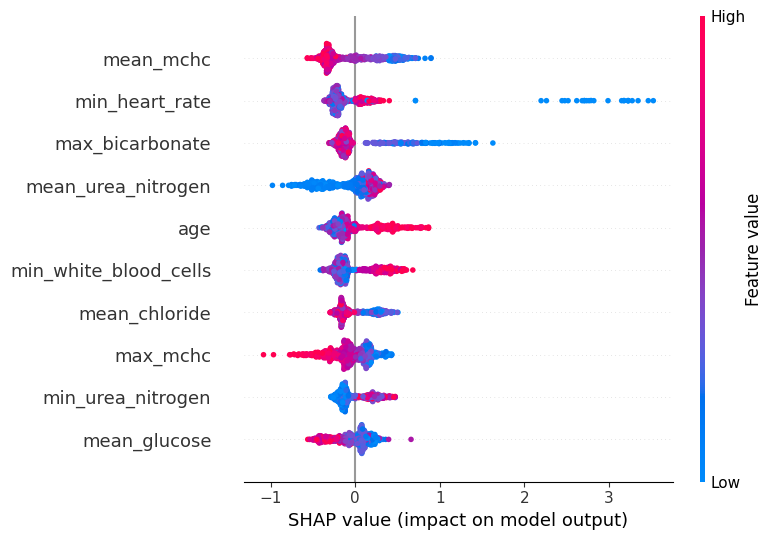

🔝 Top 10 impactful features:
mean_mchc                0.308884
min_heart_rate           0.272702
max_bicarbonate          0.241959
mean_urea_nitrogen       0.222969
age                      0.218425
min_white_blood_cells    0.217628
mean_chloride            0.187015
max_mchc                 0.178222
min_urea_nitrogen        0.170119
mean_glucose             0.163203
dtype: float32


In [63]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import shap
import pandas as pd

# Load and prepare data
onco_cohort_ML 
X = onco_cohort_ML.drop(columns=['mortality_30d'] + columns_to_drop_from_features, errors='ignore')
y = onco_cohort_ML['mortality_30d']

X = X.select_dtypes(include=[np.number])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# Fit XGBoost
model = xgb.XGBClassifier(n_estimators=100, max_depth=4, learning_rate=0.1, use_label_encoder=False, eval_metric='logloss')
model.fit(X_train, y_train)

# SHAP explanation
explainer = shap.Explainer(model)
shap_values = explainer(X_test)

# Summary plot
shap.summary_plot(shap_values, X_test, max_display=10)

# Feature importance (mean abs SHAP)
shap_df = pd.DataFrame(shap_values.values, columns=X.columns)
mean_shap = shap_df.abs().mean().sort_values(ascending=False)
print("🔝 Top 10 impactful features:")
print(mean_shap.head(10))




In [44]:
mean_shap.head(10)

mean_mchc                0.322190
slope_bicarbonate        0.298616
min_heart_rate           0.262508
min_white_blood_cells    0.222290
min_urea_nitrogen        0.220075
max_bicarbonate          0.219432
mean_chloride            0.208670
age                      0.148905
mean_rdw                 0.137261
mean_bicarbonate         0.123875
dtype: float32

In [67]:
top_10_features = mean_shap.head(10).index.tolist()

missing_cols = [col for col in top_10_features if col not in onco_cohort_ML.columns]

if missing_cols:
    print("⚠️ These top SHAP features were not found in the original DataFrame:")
    print(missing_cols)


In [68]:
# Combine identifiers, top SHAP features, and target
all_selected_columns = columns_to_drop_from_features + top_10_features + ['mortality_30d']

# Filter to only columns that exist in the DataFrame
valid_columns = [col for col in all_selected_columns if col in onco_cohort_ML.columns]

# Create the final subset DataFrame
final_feature_subset = onco_cohort_ML[valid_columns].copy()

# Confirm result
print(f"✅ Saved {final_feature_subset.shape[0]} rows × {final_feature_subset.shape[1]} columns")
print("Included columns:", final_feature_subset.columns.tolist())


✅ Saved 4081 rows × 19 columns
Included columns: ['icustay_id', 'subject_id', 'hadm_id', 'admittime', 'dob', 'intime', 'outtime', 'icd9_code', 'mean_mchc', 'min_heart_rate', 'max_bicarbonate', 'mean_urea_nitrogen', 'age', 'min_white_blood_cells', 'mean_chloride', 'max_mchc', 'min_urea_nitrogen', 'mean_glucose', 'mortality_30d']


In [70]:

# Optional: Save the subset
final_feature_subset.to_parquet(
    "/Users/sangeethgeorge/MyProjects/oncoai-patient-outcome-navigator/data/onco_features_cleaned.parquet",
    index=False
)